In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
import time

**Код**

In [2]:
def plot_levels(Q_def, lx=-6, rx=6, ly=-6, ry=6, gridsize=50, levels=(50), path=None, start=None, finish=None):
    plt.figure()
    a = np.linspace(lx, rx, gridsize)
    b = np.linspace(ly, ry, gridsize)
    _x, _y = np.meshgrid(a, b)
    c = plt.contour(_x, _y, Q_def([_x, _y]), levels=levels)
    if path != None:
        c = plt.scatter(path[0], path[1], s=3, c='r')
    if start!= None:
        c = plt.scatter(start[0], start[1], s=10, c='g')
        print('green point = start')
    if finish != None:
        c = plt.scatter(finish[0], finish[1], s=10, c='y')
        print('yellow point = finish')
    plt.show(c)

In [3]:
def Q_value(Q, _x, _y):
    return Q.evalf(subs={x:_x, y:_y})

In [4]:
def build_config(zx, zy, h, Q):
    N = 2
    e = [(1, 0), (0, 1)]
    new_zx = zx
    new_zy = zy
    for i in range(0, N):
        tmpx = new_zx + h * e[i][0]
        tmpy = new_zy + h * e[i][1]
        if Q_value(Q, tmpx, tmpy) < Q_value(Q, new_zx, new_zy):
            new_zx = tmpx
            new_zy = tmpy
        else:
            tmpx = new_zx - h * e[i][0]
            tmpy = new_zy - h * e[i][1]
            if Q_value(Q, tmpx, tmpy) < Q_value(Q, new_zx, new_zy):
                new_zx = tmpx
                new_zy = tmpy
    return (new_zx, new_zy)

In [5]:
# h >> eps
def Hooke_Jeeves(Q, x0, y0, h, maxiter, eps=1e-5):
    t0 = time.time()
    all_x = [] ##
    all_y = [] ##
    Y = [(None, None)]*(maxiter+2)
    Y[0] = (x0, y0)
    Z = [(None, None)]*(maxiter+2)
    iter_counter = 0
    # step 0
    alpha = 2
    
    while iter_counter < maxiter:
        # step 1
        Z[1] = Y[0]
        all_x.append(Z[1][0]) ##
        all_y.append(Z[1][1]) ##
        k = 0
        while iter_counter < maxiter:
            iter_counter += 1
            # step 2
            cfg = build_config(Z[k+1][0], Z[k+1][1], h, Q)
            Y[k+1] = cfg
            all_x.append(cfg[0])
            all_y.append(cfg[1])
            # step 3
            if Q_value(Q, Y[k+1][0], Y[k+1][1]) < Q_value(Q, Y[k][0], Y[k][1]):
                k = k + 1
                tmp = (Y[k][0] + alpha*(Y[k][0] - Y[k-1][0]), Y[k][1] + alpha*(Y[k][1] - Y[k-1][1]))
                Z[k+1] = tmp
                all_x.append(tmp[0]) ##
                all_y.append(tmp[1]) ##
                continue # goto step 2
            else:
                if h <= eps:
                    print(f'Time: {time.time()-t0} seconds')
                    return Y[k], (all_x, all_y), iter_counter # Y[k], Y, iter_counter
                else:
                    if k == 0:
                        h = h / 2
                    else:
                        Y[0] = Y[k]
                    break # goto step 1
    print(f'Time: {time.time()-t0} seconds')
    return Y[k], all_x, all_y, iter_counter# Y[k], Y, iter_counter

In [6]:
def fix_and_convert_path(raw_path):
    # raw_path = [(x, y), (x, y), (x, y), ..., (None, None), ... (None, None)]
    path_x = []
    path_y = []
    for point in raw_path:
        if point[0] != None and point[1] != None:
            path_x.append(point[0])
            path_y.append(point[1])
        else:
            break
    return (path_x, path_y)

## Rosenbrock

In [7]:
x = sp.symbols('x')
y = sp.symbols('y')

In [8]:
Rosenbrock = (1-x)**2 + 100*(y-x**2)**2

In [9]:
Rosenbrock

(1 - x)**2 + 100*(-x**2 + y)**2

In [10]:
def rosenbrock_def(x):
  return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

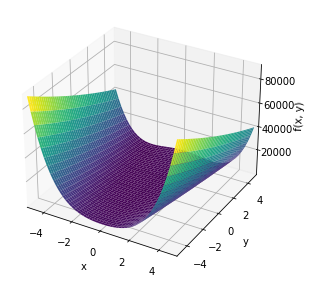

In [11]:
sp.plotting.plot3d(Rosenbrock, (x, -5, 5), (y, -5 , 5))

In [12]:
start_x = -5
start_y = -5

In [13]:
res_point, res_path, iter_count = Hooke_Jeeves(Rosenbrock, start_x, start_y, 0.01, 10000, 1e-6)

Time: 0.2184433937072754 seconds


In [14]:
res_point

(1.0000976562498969, 1.0001953124999008)

In [15]:
Q_value(Rosenbrock, res_point[0], res_point[1])

9.53675223866521e-9

In [16]:
#res_path = fix_and_convert_path(res_path)

In [17]:
iter_count

79

green point = start
yellow point = finish


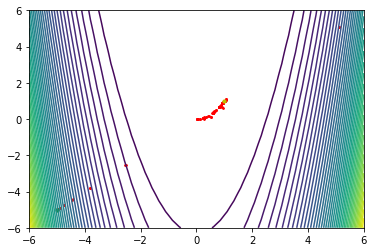

In [18]:
plot_levels(rosenbrock_def, path=res_path, start=(start_x, start_y), finish=res_point)

## Goldstein–Price

In [19]:
x = sp.symbols('x')
y = sp.symbols('y')

In [20]:
Goldstein = (1+((x+y+1)**2)*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))

In [21]:
Goldstein

((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)

In [22]:
def goldstein_def(x):
  return (1+((x[0]+x[1]+1)**2)*(19-14*x[0]+3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2))*(30+((2*x[0]-3*x[1])**2)*(18-32*x[0]+12*x[0]**2+48*x[1]-36*x[0]*x[1]+27*x[1]**2))

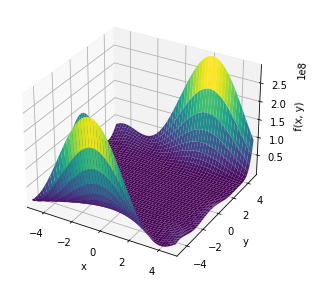

In [23]:
sp.plotting.plot3d(Goldstein, (x, -5, 5), (y, -5 , 5))

In [24]:
start_x = -5
start_y = -5

In [25]:
res_point, res_path, iter_count = Hooke_Jeeves(Goldstein, start_x, start_y, 0.01, 10000, 1e-6)

Time: 1.065772294998169 seconds


In [26]:
res_point

(-9.569602055226056e-14, -1.0000000000000882)

In [27]:
Q_value(Goldstein, res_point[0], res_point[1])

3.00000000000000

In [28]:
#res_path = fix_and_convert_path(res_path)

In [29]:
iter_count

56

green point = start
yellow point = finish


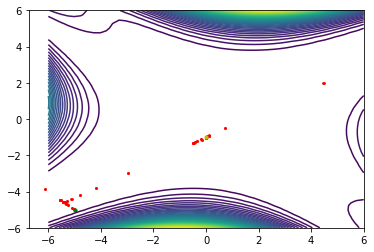

In [30]:
plot_levels(goldstein_def, path=res_path, start=(start_x, start_y), finish=res_point)

## Matyas

In [31]:
x = sp.symbols('x')
y = sp.symbols('y')

In [32]:
Matyas = 0.26*(x**2+y**2)-0.48*x*y

In [33]:
Matyas

0.26*x**2 - 0.48*x*y + 0.26*y**2

In [34]:
def matyas_def(x):
  return (0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1])

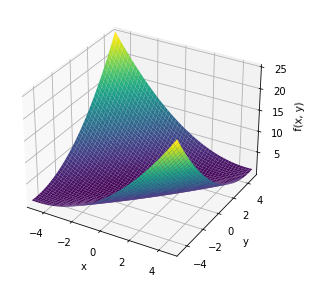

In [35]:
sp.plotting.plot3d(Matyas, (x, -5, 5), (y, -5 , 5))

In [36]:
start_x = -5
start_y = -5

In [37]:
res_point, res_path, iter_count = Hooke_Jeeves(Matyas, start_x, start_y, 0.01, 10000, 1e-6)

Time: 0.06981277465820312 seconds


In [38]:
res_point

(2.4414061432104216e-06, 2.4414061432104216e-06)

In [39]:
Q_value(Matyas, res_point[0], res_point[1])

2.38418558244224e-13

In [40]:
#res_path = fix_and_convert_path(res_path)

In [41]:
iter_count

40

green point = start
yellow point = finish


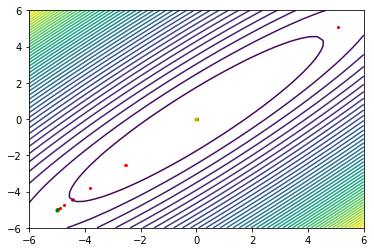

In [42]:
plot_levels(matyas_def, path=res_path, start=(start_x, start_y), finish=res_point)

## Himmelblau's

In [43]:
x = sp.symbols('x')
y = sp.symbols('y')

In [44]:
Himmel = (x**2+y-11)**2+(x+y**2-7)**2

In [45]:
Himmel

(x + y**2 - 7)**2 + (x**2 + y - 11)**2

In [46]:
def himmel_def(x):
  return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

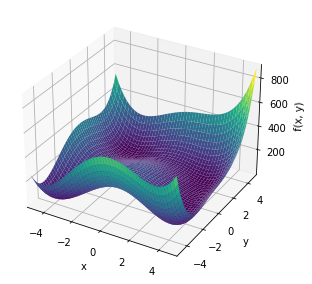

In [47]:
sp.plotting.plot3d(Himmel, (x, -5, 5), (y, -5 , 5))

In [48]:
start_x = -5
start_y = -5

In [49]:
res_point, res_path, iter_count = Hooke_Jeeves(Himmel, start_x, start_y, 0.01, 10000, 1e-6)

Time: 0.11269879341125488 seconds


In [50]:
res_point

(-3.7793103027344004, -3.2831860351562865)

In [51]:
Q_value(Himmel, res_point[0], res_point[1])

1.65354260918301e-13

In [52]:
#res_path = fix_and_convert_path(res_path)

In [53]:
iter_count

63

green point = start
yellow point = finish


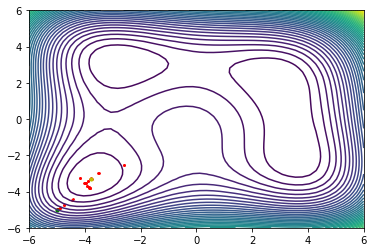

In [54]:
plot_levels(himmel_def, path=res_path, start=(start_x, start_y), finish=res_point)